In [ ]:
# Para manipulacao dos dados
import pandas as pd
import numpy as np

# para graficos
import seaborn as sns
import matplotlib.pyplot as plt
!pip install sweetviz
import sweetviz as sv 

# para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#### Settings ####
pd.set_option("max_colwidth", 1000)
pd.set_option("max_rows", 20)
pd.set_option("max_columns", 1000)
pd.set_option("precision", 2)
pd.options.display.float_format = "{:,.2f}".format
plt.style.use("classic")
# %load_ext nb_black



     |████████████████████████████████| 15.1 MB 4.4 MB/s 


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


In [ ]:
base = df.rename(columns={'Gender': 'Gênero', 'Customer Type':'Tipo_de_cliente', 'Age':'Idade', 'Type of Travel':'Tipo_de_classe_de_viagem', 
                          'Class':'Classe', 'Flight Distance':'Distância_de_Voo', 'Inflight wifi service':'Serviço_wi-fi_a_bordo', 
                          'Departure/Arrival time convenient':'Hora_de_partida|chegada_conveniente', 'Ease of Online booking':'Facilidade_de_reserva_online',
                          'Gate location':'Localização_do_portão', 'Food and drink':'Comida_e_bebida', 'Online_boarding':'Embarque_online',
                          'Seat comfort':'Conforto_do_assento', 'Inflight entertainment':'Entretenimento_em_voô', 'Serviço_de_bordo':'Serviço_de_bordo',
                          'Leg room service':'Serviço_de_quarto_para_pernas', 'Baggage_handling':'Manuseio_de_bagagem', 'Checkin service':'Serviço_de_check-in',
                          'Inflight service':'Serviço_em_voo', 'Cleanliness':'Limpeza','Departure Delay in Minutes':'Atraso_de_Partida_em_Minutos',
                          'Arrival Delay in Minutes':'Atraso_na_chegada_em_minutos', 'satisfaction':'satisfação'
                          })
base.head()

,Unnamed: 0,id,Gênero,Tipo_de_cliente,Idade,Tipo_de_classe_de_viagem,Classe,Distância_de_Voo,Serviço_wi-fi_a_bordo,Hora_de_partida|chegada_conveniente,Facilidade_de_reserva_online,Localização_do_portão,Comida_e_bebida,Online boarding,Conforto_do_assento,Entretenimento_em_voô,On-board service,Serviço_de_quarto_para_pernas,Baggage handling,Serviço_de_check-in,Serviço_em_voo,Limpeza,Atraso_de_Partida_em_Minutos,Atraso_na_chegada_em_minutos,satisfação
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied


In [ ]:
base.shape

(103904, 25)

In [ ]:
base.describe()

,Unnamed: 0,id,Idade,Distância_de_Voo,Serviço_wi-fi_a_bordo,Hora_de_partida|chegada_conveniente,Facilidade_de_reserva_online,Localização_do_portão,Comida_e_bebida,Online boarding,Conforto_do_assento,Entretenimento_em_voô,On-board service,Serviço_de_quarto_para_pernas,Baggage handling,Serviço_de_check-in,Serviço_em_voo,Limpeza,Atraso_de_Partida_em_Minutos,Atraso_na_chegada_em_minutos
count,"103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,594.00"
mean,"51,951.50","64,924.21",39.38,"1,189.45",2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,"29,994.65","37,463.81",15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,0.00,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,"25,975.75","32,533.75",27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,"51,951.50","64,856.50",40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,"77,927.25","97,368.25",51.00,"1,743.00",4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,"103,903.00","129,880.00",85.00,"4,983.00",5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,"1,592.00","1,584.00"


In [ ]:
base.isna().sum()

Unnamed: 0                        0
id                                0
Gênero                            0
Tipo_de_cliente                   0
Idade                             0
                               ... 
Serviço_em_voo                    0
Limpeza                           0
Atraso_de_Partida_em_Minutos      0
Atraso_na_chegada_em_minutos    310
satisfação                        0
Length: 25, dtype: int64

In [ ]:
print('Porcentagem de Homens e mulheres que responderam a pesquisa!\n')
base.Gênero.value_counts(normalize=True).sort_index() * 100

#base.Gênero.value_counts()


Porcentagem de Homens e mulheres que responderam a pesquisa!



Female   50.75
Male     49.25
Name: Gênero, dtype: float64

In [ ]:
print('Porcentagem de clientes fieis e clientes infieis\n')
base.Tipo_de_cliente.value_counts(normalize=True).sort_index() * 100

# base.Tipo_de_cliente.value_counts()

Porcentagem de clientes fieis e clientes infieis



Loyal Customer      81.73
disloyal Customer   18.27
Name: Tipo_de_cliente, dtype: float64

In [ ]:
crianca = len(base.query('Idade > 10 < 20'))
jovem = len(base.query('Idade > 20 < 40'))
idoso = len(base.query('Idade > 60 < 100'))

print(f' A quantidade de criancas de 10 à 20 anos foram: {crianca}!\n',
f'A quantidade de jovens de 20 à 40 anos foram: {jovem}!\n',
f'A quantidade de jovens de 60 à 80 anos foram: {idoso}!')

 A quantidade de criancas de 10 à 20 anos foram: 101327!
 A quantidade de jovens de 20 à 40 anos foram: 92571!
 A quantidade de jovens de 60 à 80 anos foram: 7976!


In [ ]:
# Método para tentar inferir se a variavel é categorica

provavel_categorica = {}

for var in base.columns:
  provavel_categorica[var] = 1.0 * base[var].nunique()/base[var].count() < 0.03
provavel_categorica # mostra o que é categorico.


{'Atraso_de_Partida_em_Minutos': True,
 'Atraso_na_chegada_em_minutos': True,
 'Baggage handling': True,
 'Classe': True,
 'Comida_e_bebida': True,
 'Conforto_do_assento': True,
 'Distância_de_Voo': False,
 'Entretenimento_em_voô': True,
 'Facilidade_de_reserva_online': True,
 'Gênero': True,
 'Hora_de_partida|chegada_conveniente': True,
 'Idade': True,
 'Limpeza': True,
 'Localização_do_portão': True,
 'On-board service': True,
 'Online boarding': True,
 'Serviço_de_check-in': True,
 'Serviço_de_quarto_para_pernas': True,
 'Serviço_em_voo': True,
 'Serviço_wi-fi_a_bordo': True,
 'Tipo_de_classe_de_viagem': True,
 'Tipo_de_cliente': True,
 'Unnamed: 0': False,
 'id': False,
 'satisfação': True}

In [ ]:
# Porcentagem de clientes satisfeitos e insatisfeitos
base.satisfação.value_counts(normalize=True) * 100

neutral or dissatisfied   56.67
satisfied                 43.33
Name: satisfação, dtype: float64

In [ ]:
# Inserindo condições de 0 e 1
# base['Cliente_fiel'] = np.where(base['Tipo_de_cliente'] == "Loyal Customer", 1, 0) # Cria coluna de 0 e 1
# base['Sexo'] = np.where(base['Gênero'] == "Male", 1, 0) # Cria coluna de 0 e 1
base['Resultado'] = np.where(base['satisfação'] == "neutral or dissatisfied", 0, 1) # Cria coluna de 0 e 1

base.head(10)

,Unnamed: 0,id,Gênero,Tipo_de_cliente,Idade,Tipo_de_classe_de_viagem,Classe,Distância_de_Voo,Serviço_wi-fi_a_bordo,Hora_de_partida|chegada_conveniente,Facilidade_de_reserva_online,Localização_do_portão,Comida_e_bebida,Online boarding,Conforto_do_assento,Entretenimento_em_voô,On-board service,Serviço_de_quarto_para_pernas,Baggage handling,Serviço_de_check-in,Serviço_em_voo,Limpeza,Atraso_de_Partida_em_Minutos,Atraso_na_chegada_em_minutos,satisfação,Resultado
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied,1
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.00,neutral or dissatisfied,0
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.00,neutral or dissatisfied,0
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.00,satisfied,1
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.00,neutral or dissatisfied,0
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.00,neutral or dissatisfied,0


In [ ]:
base.Classe.value_counts(normalize=True) * 100

Business   47.80
Eco        44.99
Eco Plus    7.21
Name: Classe, dtype: float64

In [ ]:
# base['Nota_voo'] = nova_lista
# base.head(10)

## 4. MODELAGEM DE MACHINE LEARNING: RANDOM FOREST,

In [ ]:
base['Resultado'] = np.where(base['satisfação'] == "satisfied", 1, 0) # Cria coluna de 0 e 1

In [ ]:
base.columns

Index(['Unnamed: 0', 'id', 'Gênero', 'Tipo_de_cliente', 'Idade',
       'Tipo_de_classe_de_viagem', 'Classe', 'Distância_de_Voo',
       'Serviço_wi-fi_a_bordo', 'Hora_de_partida|chegada_conveniente',
       'Facilidade_de_reserva_online', 'Localização_do_portão',
       'Comida_e_bebida', 'Online boarding', 'Conforto_do_assento',
       'Entretenimento_em_voô', 'On-board service',
       'Serviço_de_quarto_para_pernas', 'Baggage handling',
       'Serviço_de_check-in', 'Serviço_em_voo', 'Limpeza',
       'Atraso_de_Partida_em_Minutos', 'Atraso_na_chegada_em_minutos',
       'satisfação', 'Resultado'],
      dtype='object')

In [ ]:
base.head()

,Unnamed: 0,id,Gênero,Tipo_de_cliente,Idade,Tipo_de_classe_de_viagem,Classe,Distância_de_Voo,Serviço_wi-fi_a_bordo,Hora_de_partida|chegada_conveniente,Facilidade_de_reserva_online,Localização_do_portão,Comida_e_bebida,Online boarding,Conforto_do_assento,Entretenimento_em_voô,On-board service,Serviço_de_quarto_para_pernas,Baggage handling,Serviço_de_check-in,Serviço_em_voo,Limpeza,Atraso_de_Partida_em_Minutos,Atraso_na_chegada_em_minutos,satisfação,Resultado
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00,neutral or dissatisfied,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00,neutral or dissatisfied,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00,satisfied,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00,neutral or dissatisfied,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00,satisfied,1


In [ ]:
# lISTANDO AS COLUNA DE DADOS QUE IREMOS SUAR

features = ['Gênero', 'Tipo_de_cliente','Tipo_de_classe_de_viagem', 'Classe',
       'Serviço_wi-fi_a_bordo', 'Hora_de_partida|chegada_conveniente',
       'Facilidade_de_reserva_online', 'Localização_do_portão',
       'Comida_e_bebida', 'Online boarding', 'Conforto_do_assento',
       'Entretenimento_em_voô', 'On-board service',
       'Serviço_de_quarto_para_pernas', 'Baggage handling',
       'Serviço_de_check-in', 'Serviço_em_voo', 'Limpeza']

target = 'Resultado'

In [ ]:
# Divisão mde dados para treinamento

from sklearn.model_selection import train_test_split # separar por treino e teste

X = base[features] # colunas de treino
y = base[target] # Colunas de teste

# função de treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state = 999
)
# teste_size = 25%(Será separado em uma porcentagem, nesse caso) // Random entre 999

In [ ]:
# Tratando as variaveis categoricas (cuidado quando for numerica)

cat_features = ['Gênero', 'Tipo_de_cliente','Tipo_de_classe_de_viagem', 'Classe'] # Categorica
num_features = ['Serviço_wi-fi_a_bordo', 'Hora_de_partida|chegada_conveniente',
       'Facilidade_de_reserva_online', 'Localização_do_portão',
       'Comida_e_bebida', 'Online boarding', 'Conforto_do_assento',
       'Entretenimento_em_voô', 'On-board service',
       'Serviço_de_quarto_para_pernas', 'Baggage handling',
       'Serviço_de_check-in', 'Serviço_em_voo', 'Limpeza'] # nuemricas

In [ ]:
# Instalar o pacote de transformação de categoria em binario

!pip install category_encoders
import category_encoders as ce # Transforma colunas categoricas em binarias

encoder = ce.OneHotEncoder(cols=cat_features) # Como transformar

X_train = encoder.fit_transform(X_train) 
# Fazendo tratamento para treinar a rede neural

X_train.head() # Ver base do treino

     |████████████████████████████████| 82 kB 336 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Gênero_1,Gênero_2,Tipo_de_cliente_1,Tipo_de_cliente_2,Tipo_de_classe_de_viagem_1,Tipo_de_classe_de_viagem_2,Classe_1,Classe_2,Classe_3,Serviço_wi-fi_a_bordo,Hora_de_partida|chegada_conveniente,Facilidade_de_reserva_online,Localização_do_portão,Comida_e_bebida,Online boarding,Conforto_do_assento,Entretenimento_em_voô,On-board service,Serviço_de_quarto_para_pernas,Baggage handling,Serviço_de_check-in,Serviço_em_voo,Limpeza
33366,1,0,1,0,1,0,1,0,0,5,5,4,5,2,5,5,3,3,5,3,4,3,2
46869,0,1,1,0,1,0,0,1,0,2,3,3,3,4,5,2,2,2,2,2,2,2,1
17845,1,0,1,0,0,1,0,1,0,1,5,1,4,1,1,1,1,3,5,4,4,5,1
99698,1,0,0,1,1,0,0,1,0,3,4,3,3,1,3,1,1,1,4,4,2,4,1
16301,1,0,1,0,1,0,0,1,0,3,4,4,4,3,3,3,3,3,5,3,3,3,3


In [ ]:
# aplicando trataemntopara teste na rede neural e como ver

X_test = encoder.transform(X_test)

X_test.head() # Visualizar

,Gênero_1,Gênero_2,Tipo_de_cliente_1,Tipo_de_cliente_2,Tipo_de_classe_de_viagem_1,Tipo_de_classe_de_viagem_2,Classe_1,Classe_2,Classe_3,Serviço_wi-fi_a_bordo,Hora_de_partida|chegada_conveniente,Facilidade_de_reserva_online,Localização_do_portão,Comida_e_bebida,Online boarding,Conforto_do_assento,Entretenimento_em_voô,On-board service,Serviço_de_quarto_para_pernas,Baggage handling,Serviço_de_check-in,Serviço_em_voo,Limpeza
49734,0,1,1,0,1,0,1,0,0,2,2,2,2,5,5,5,5,5,5,5,5,5,3
50344,1,0,1,0,0,1,0,1,0,0,4,0,2,4,0,4,4,3,3,1,4,2,4
89920,1,0,1,0,1,0,0,1,0,4,5,5,5,4,4,4,4,2,3,4,4,3,4
60141,0,1,1,0,1,0,1,0,0,2,2,2,2,5,5,4,4,4,4,4,5,4,5
30363,1,0,0,1,1,0,0,1,0,1,1,1,4,3,1,3,3,3,5,4,2,3,3


In [ ]:
# Treinando

clf_RF = RandomForestClassifier() # Cria o objeto
clf_RF.fit(X_train, y_train) # Aplica o treino nas variaveis

RandomForestClassifier()

In [ ]:
# Aplciar o teste

y_pred = clf_RF.predict(X_test) # Executando o teste

y_pred # Mostrar resultado do teste

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Porcentagem de acertos no codigo

from sklearn.metrics import accuracy_score

print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))  # quantidade de acertos do codigo

from sklearn.metrics import f1_score

print(
    "F1 Score: {:.2f}%".format(f1_score(y_test, y_pred) * 100)
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 95.94%
F1 Score: 95.22%


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Positive: " + str(tp)) # Verdadeiro positivo
print("True Negative: " + str(tn)) # Verdadeiro Negativo
print("False Positive: " + str(fp)) # Falso positivo
print("False Negative: " + str(fn)) # Falso Negativo

True Positive: 12608
True Negative: 17299
False Positive: 402
False Negative: 863


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     17701
           1       0.97      0.94      0.95     13471

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172



In [ ]:
#  Importancia das colunas
feature_imp = pd.Series(clf_RF.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp

Online boarding                       0.17
Serviço_wi-fi_a_bordo                 0.13
Tipo_de_classe_de_viagem_1            0.07
Classe_1                              0.07
Entretenimento_em_voô                 0.06
                                      ... 
Hora_de_partida|chegada_conveniente   0.02
Comida_e_bebida                       0.01
Gênero_2                              0.00
Gênero_1                              0.00
Classe_3                              0.00
Length: 23, dtype: float64

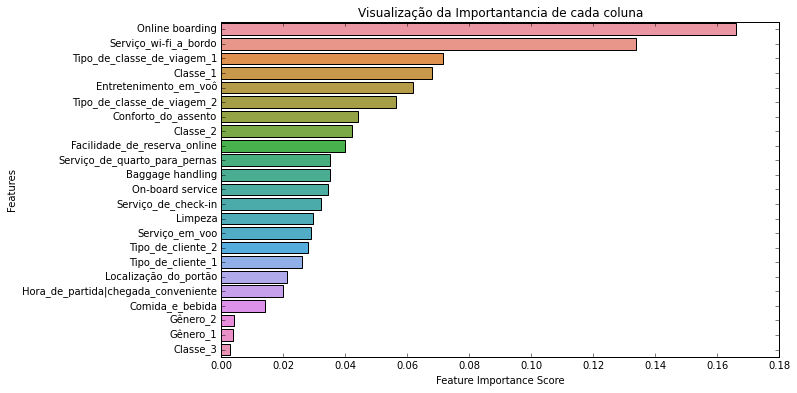

In [ ]:
# Creating a bar plot // Visualizar a imporancia de cada coluna dentro da rede neural.
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualização da Importantancia de cada coluna")
_ = plt.savefig("rf_features.png")

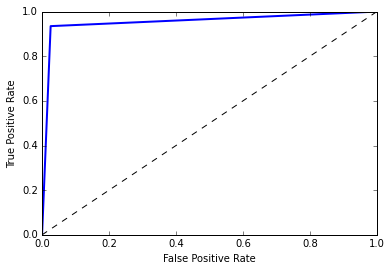

In [ ]:
# CURVA ROC: calcula fpr e tpr para vários limiares, Verificar a quantidade ce acertos e erros.
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)

# **Visualização em grafico**

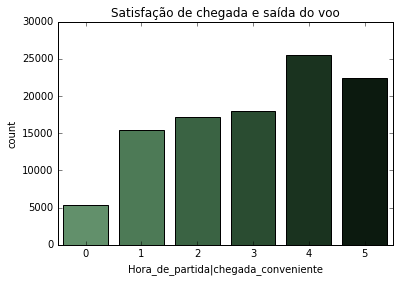

In [ ]:
pallete = sns.color_palette('Blues', 5) # Cria Pallete  de cores
pallete = sns.cubehelix_palette(7, start=2, rot=0, dark=0, light=.5)
# _ = sns.countplot(base['Hora_de_partida|chegada_conveniente'], palette=pallete) # aplica no grafico
_ = sns.countplot(data = base, x='Hora_de_partida|chegada_conveniente', palette=pallete)
_ = plt.title('Satisfação de chegada e saída do voo')
_ = plt.show()

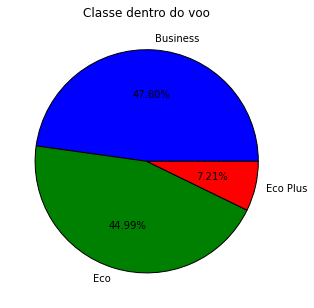

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=base['Classe'].value_counts(),labels= base['Classe'].value_counts().index, autopct='%0.2f%%')
plt.title("Classe dentro do voo")
plt.show()

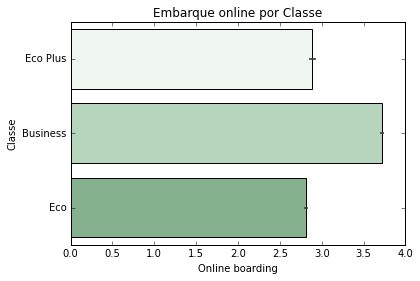

In [ ]:
palt = sns.color_palette('BrBG', 5) # Cria Pallete  de cores
palt = sns.cubehelix_palette(7, start=2, rot=0, dark=0, light=.95)
Gener = sns.barplot(data = base, x='Online boarding', y ='Classe', palette=palt)
plt.title("Embarque online por Classe")
plt.show()

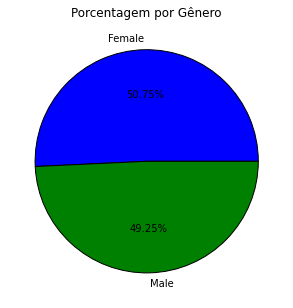

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=base['Gênero'].value_counts(),labels= base['Gênero'].value_counts().index, autopct='%0.2f%%')
plt.title("Porcentagem por Gênero")
plt.show()

# **ML de Classificação**

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_CLA = MLPClassifier(hidden_layer_sizes=(10,), learning_rate='constant',
                    learning_rate_init=0.001, max_iter=3000)
clf_CLA.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=3000)

In [ ]:
x_pred = clf_CLA.predict(X_test) # Executando o teste

x_pred # Mostrar resultado do teste

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
# Porcentagem de acertos no codigo

from sklearn.metrics import accuracy_score

print("Acurácia: {:.2f}%".format(accuracy_score(y_test, x_pred) * 100))  # quantidade de acertos do codigo

from sklearn.metrics import f1_score

print(
    "F1 Score: {:.2f}%".format(f1_score(y_test, x_pred) * 100)
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 95.49%
F1 Score: 94.67%


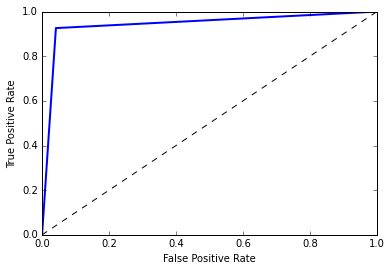

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_CLA, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr)

# **ML de Regressão**

In [ ]:
from sklearn.neural_network import MLPRegressor

clf_GRE = MLPRegressor(hidden_layer_sizes=(10,), learning_rate='constant',
                    learning_rate_init=0.001, max_iter=3000)
clf_GRE.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=3000)

In [ ]:
z_pred = clf_GRE.predict(X_test) # Executando o teste

z_pred # Mostrar resultado do teste

array([1.1707102 , 0.30365657, 0.64307922, ..., 0.01375553, 0.1988983 ,
       0.49494332])

In [ ]:
acuracia_trein = clf_GRE.score(X_test, y_test)
print("Acurácia do Treinamento = %.2f%%" %(acuracia_trein*100.0))


Acurácia do Treinamento = 72.59%


**DASHBOARD AUTOMATIZADO**


In [ ]:
# Dashboard com duas linhas / Usando SWEETVIZ

reporte = sv.analyze(base) # Fazer analise do grafico
reporte.show_html()

# Para abrir o arquivo SWEETVIZ_REPORT procure nos arquivo a direita.
# Se clicar em um grafico ele trava

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
